In [1]:
import numpy as np

# plotting modules
from matplotlib import pyplot as plt
import plotly.express as px

# The web source of the MNIST dataset that we will work with
from sklearn.datasets import fetch_openml

## Obtaining the Data
We load the data from `openml.org`. [openml.org](https://openml.org/) is a public repository for machine learning data and experiments, that allows everybody to upload open datasets.The `sklearn.datasets` package is able to download datasets from the repository using the function `sklearn.datasets.fetch_openml` ([sklearn User Guide](https://scikit-learn.org/stable/datasets/loading_other_datasets.html#openml), [sklearn docs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html)).

**To the student**: 
* Browse to the openml website, and breifly describe what it contains based on its main landing page.
* Read the first two paragraphs in the [Wikipedia article](https://en.wikipedia.org/wiki/MNIST_database) describing MNIST. 
  * How many images does it have? 
  * What is the size of each image? 
  * Based on the image with _Sample images from MNIST test dataset_, how many unique digits does this dataset include?
* To get familiar with sklearn documentaion - browse the sklearn-doc to find out what `as_frame` stands for.

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

**To the student**: can you guess what _784_ stands for?

The object that is returned back from `fetch_openml` is a `Bunch` object ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)). This is a standard `sklearn` object, used for storing datasets.

In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

It is a dictionary-like object, with keys and values just like a standard Python dictionary in that sense. So we can print out all of its keys:

In [4]:
list(mnist)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

By the way, the same can be achieved by:

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

The object also contains a description of the dataset that it contains. This is provided by the curators of the dataset. It can be accessed using the `DESCR` method of the object.

In [6]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

Let's look into the `data` and the `target` attributes.

In [7]:
mnist.data.shape

(70000, 784)

In [8]:
mnist.data[0,200:205]

array([  0,   0,   0,  49, 238], dtype=int64)

In [9]:
mnist.target.shape

(70000,)

In [10]:
print(mnist.target[0], mnist.target[1], mnist.target[2])

5 0 4


**To the student**: based on the examples above, as well as the info in `DESCR` and Wikipedia, can you describe:
* What `70000`, `784` stand for? 
* What do the elements of the `mnist.data` array represent (e.g. `0`, `49`)?
* What do the values in `mnist.target` represent?

Let's rename these objects to our familiar conventions, that are common regardless of the specific dataset being studied:

In [11]:
X = mnist.data
y = mnist.target

It will be good at this point to look at actual data instance, which is a single image:

In [27]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [12]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

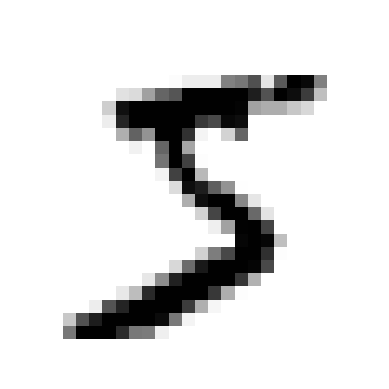

In [13]:
some_digit = X[0]  # here we are using the first image in the dataset
plot_digit(some_digit)
plt.show()

In [14]:
y[0]  # the label for the first image

'5'

### Color Map
A note on color maps:

A color map is a way to map numbers to colors. The default color map in `matplotlib` is `viridis`. We can change it to `gray` using the `cmap` parameter in the `imshow` function. Gray scale and Binary are inversions of each other. See the Matplotlib [colormap reference](https://matplotlib.org/stable/users/explain/colors/colormaps.html#sequential2) for more information.



Text(0.5, 1.0, 'Binary Scale')

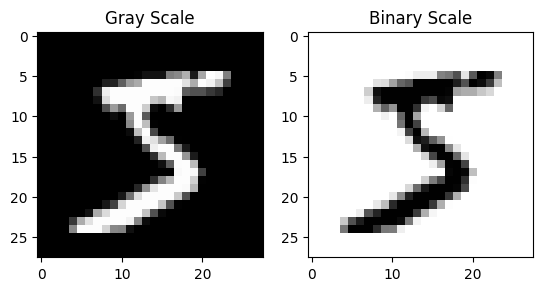

In [26]:
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(mnist.data[0].reshape(28, 28), cmap='gray')
plt.title('Gray Scale')
plt.subplot(1, 2, 2)
plt.imshow(mnist.data[0].reshape(28, 28), cmap='binary')
plt.title('Binary Scale')

For better famliarity with the dataset, let's plot the first 100 images.

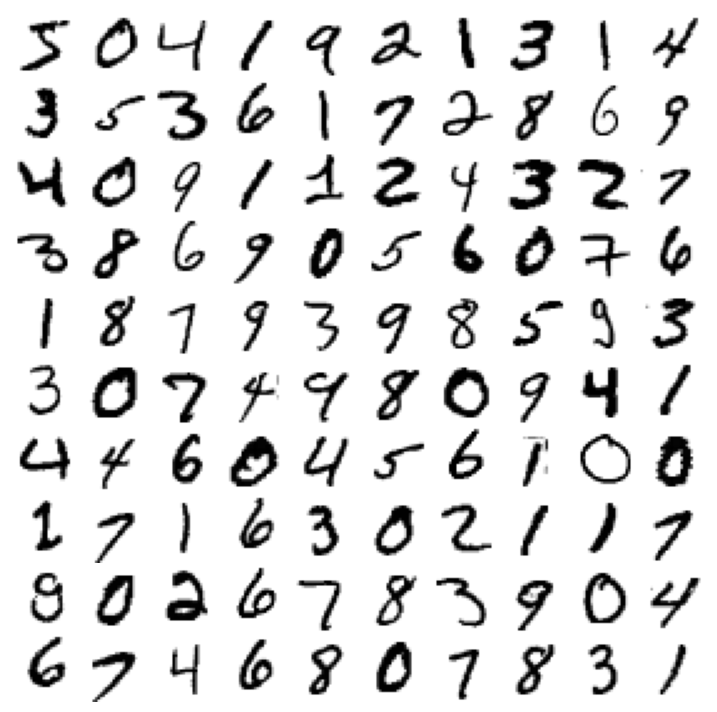

In [15]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

This provides an initial familiarity with the dataset.

An important property of a classification dataset is its skewness ([Wikipedia](https://en.wikipedia.org/wiki/Skewness)). For classification problems, the skewness is how uniform the data is in terms of the number of samples per label. In our case, it is the number of images for each digit. A uniform distribution, where each class has the same number of images, is a dataset with 0 skewness. 

**To the student**: In a new cell below, write a script that prints out the number of samples per label. Add a second Markdown cell, describing the skewness of the MNIST dataset in a sentence or two.

In [22]:
def visualize_input(i, ax, y):
    img = X[i].reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Digit no : {y[i]}")
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(img[x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
    ax.set_xticks([])
    ax.set_yticks([])

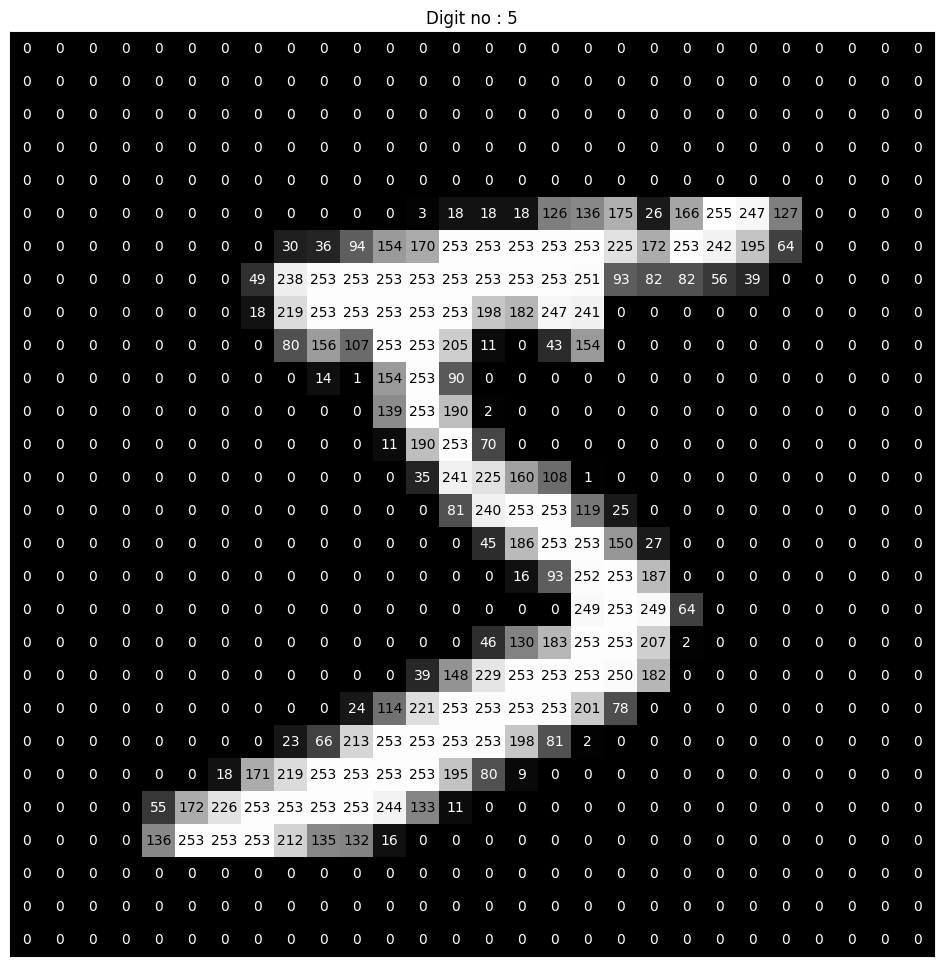

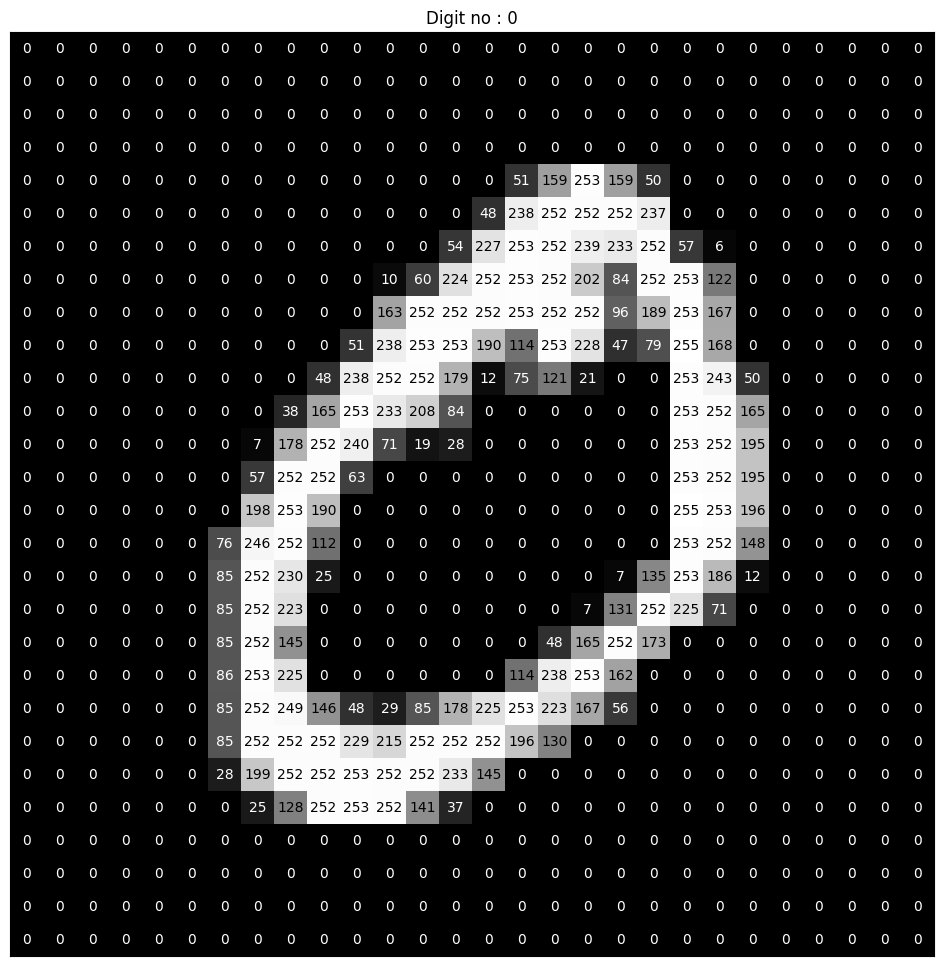

In [23]:
for i in range(2):
    fig = plt.figure(figsize = (12,12)) 
    ax = fig.add_subplot(111)
    visualize_input(i, ax, y)

## Class Imbalance

A critical check for classification problems is the class imbalance. This is the difference in the number of samples per label. A class imbalance can lead to a model that is biased towards the majority class. This is a problem because the model will be less accurate in predicting the minority class.

Also called data skewness ([Wikipedia](https://en.wikipedia.org/wiki/Skewness)). For classification problems, the skewness is how uniform the data is in terms of the number of samples per label. In our case, it is the number of images for each digit. A uniform distribution, where each class has the same number of images, is a dataset with 0 skewness. 

In [21]:
# Convert the string mnist.target to integer type
mnist.target = mnist.target.astype(np.int8)

# Count the occurrences of each class
class_counts = np.bincount(mnist.target)

# Plot a piechart using plotly
fig = px.pie(values=class_counts, names=[str(i) for i in range(10)], title='Percentage of samples per label')
fig.show()


## Image-Specific EDA

### Pixel Distribution

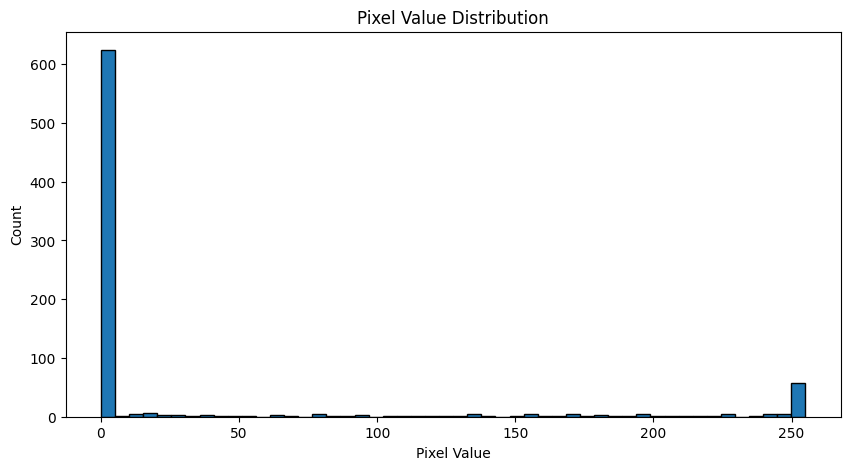

In [32]:
# Plot the distribution of pixel values
fig = plt.figure(figsize=(10, 5))
plt.hist(mnist.data[0], bins=50, edgecolor='black')
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.show()


### The Average Image per Class

This is useful when the images per class are similar, centered and, the same orientation. This is the case for the MNIST dataset.

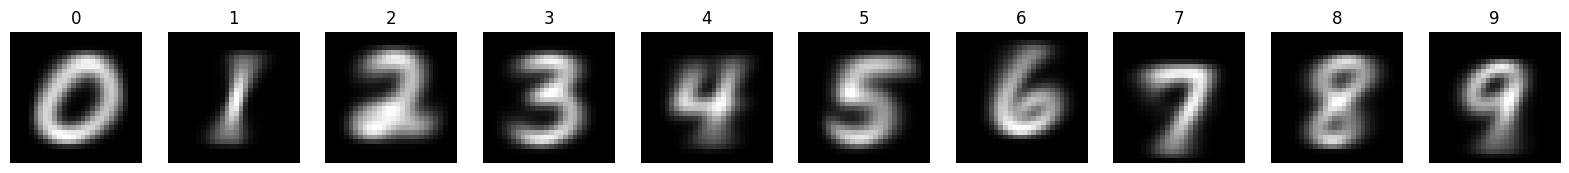

In [31]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    digit_indices = np.where(y.astype('int8') == digit)[0]
    avg_image = np.mean(X[digit_indices], axis=0).reshape(28, 28)
    axes[digit].imshow(avg_image, cmap='gray')
    axes[digit].set_title(str(digit))
    axes[digit].axis('off')
plt.show()